# Ulcer Index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import UlcerIndex

In [10]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [11]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "ui_"
    for w in windows:
        end = str(w)
        ui = UlcerIndex(df.close, window=w)
        df[name + end] = ui.ulcer_index()
        

In [12]:
variations([10, 14, 20, 30, 40, 50])

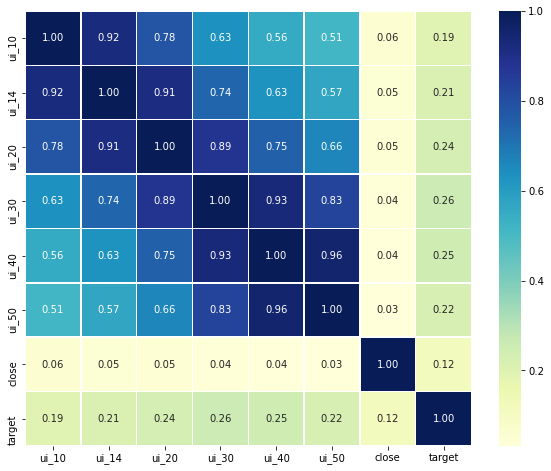

In [13]:
indicators = list(df.columns)[13:]
indicators.append("close")
indicators.append("target")


d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

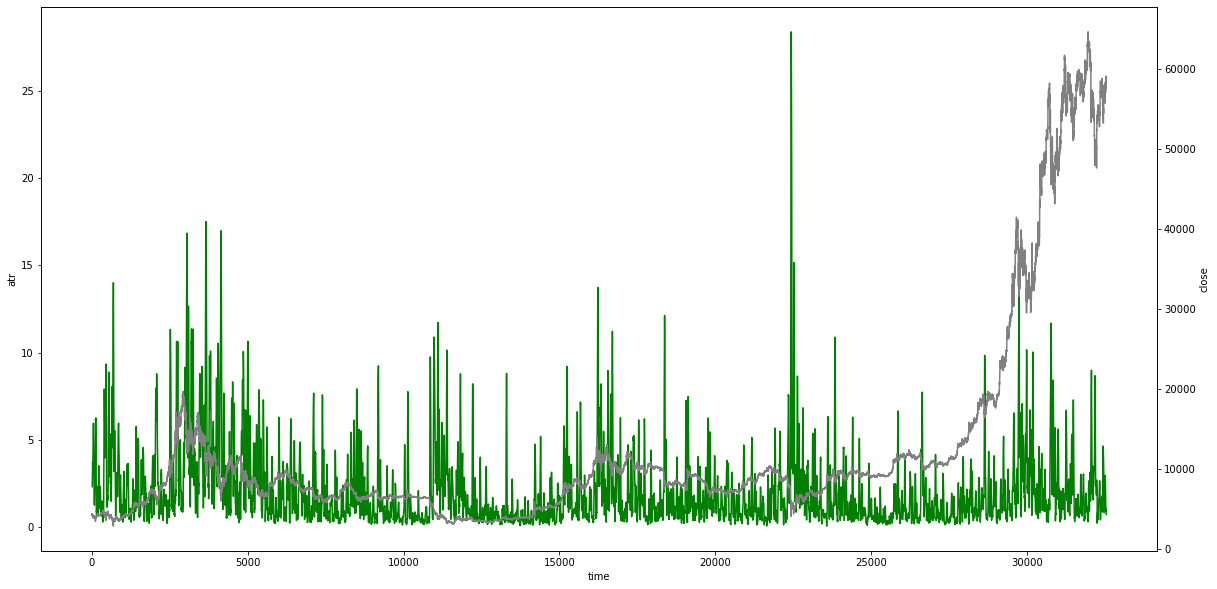

In [6]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.ui_20,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get rate

In [7]:
dplot = df[["ui_20"]].copy()
dplot["ui_20_rate"] = uf.get_rate(dplot.ui_20)

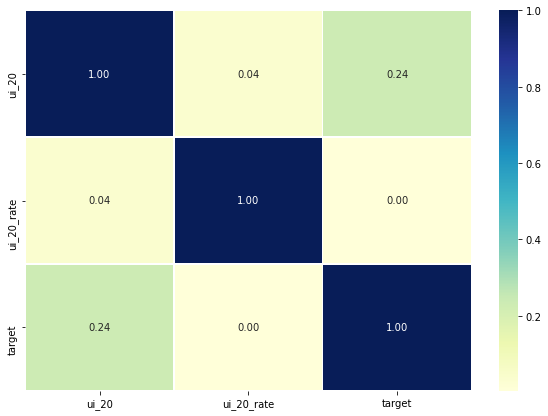

In [8]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Conclusion: Use ui 30